**Анализ тарифов на основе данных о клиентской выборке из 500 пользователей для корректировки рекламного бюджета коммерческого департамента**

**Цель: Проанализировать поведение клиентов и сделать вывод — какой тариф лучше.**

**Шаг 1. Изучим общую информацию**

In [1]:
# импортируем библеотку pandas и библиотки для построения графиков,  
# высокоуровневых математический функций, вычисления факториала 
# и для задания распределения по мат. ожиданию
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import factorial
from scipy import stats as st

# задействуем фичи, от ошибок при повторном использовании одного и того же df
# и для отображения трёх символов после запятой для всех значений с плавающей запятой
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# делаем загрузку с разных путей в зависимости от того, где запущена тетрадка - локально или на сервере ЯП
root_local = 'C:/Users/PC/проекты Яндекс/Датасеты/' #путь к данным при локальном запуске
root_yp = '/datasets/' #путь к данным при запуске на сервере ЯП
username = 'PC'
try:
    username = os.environ["USERNAME"]
except:
    pass
if(username == 'PC'): # локально
    root_path = root_local
else: # в тренажере
    root_path = root_yp    
df_calls = pd.read_csv(root_path + 'calls.csv')
df_internet = pd.read_csv(root_path + 'internet.csv')
df_messages = pd.read_csv(root_path + 'messages.csv')
df_tariffs = pd.read_csv(root_path + 'tariffs.csv')
df_users = pd.read_csv(root_path + 'users.csv')

In [3]:
# считаем данные
print(df_calls.info())
print(df_calls.describe())
print(df_calls.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
        duration    user_id
count 202607.000 202607.000
mean       6.756   1253.941
std        5.843    144.723
min        0.000   1000.000
25%        1.300   1126.000
50%        6.000   1260.000
75%       10.700   1379.000
max       38.000   1499.000
       id   call_date  duration  user_id
0  1000_0  2018-07-25     0.000     1000
1  1000_1  2018-08-17     0.000     1000
2  1000_2  2018-06-11     2.850     1000
3  1000_3  2018-09-21    13.800     1000
4  1000_4  2018-12-15     5.180     1000


In [4]:
print(df_internet.info())
print(df_internet.describe())
print(df_internet.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
       Unnamed: 0    mb_used    user_id
count  149396.000 149396.000 149396.000
mean    74697.500    370.192   1252.100
std     43127.055    278.301    144.051
min         0.000      0.000   1000.000
25%     37348.750    138.188   1130.000
50%     74697.500    348.015   1251.000
75%    112046.250    559.553   1380.000
max    149395.000   1724.830   1499.000
   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0  112.950   2018-11-25     1000
1           1  1000_1 1052.810   2018-09-07     1

In [5]:
print(df_messages.info())
print(df_messages.describe())
print(df_messages.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
         user_id
count 123036.000
mean    1256.989
std      143.524
min     1000.000
25%     1134.000
50%     1271.000
75%     1381.000
max     1499.000
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


In [6]:
print(df_tariffs.info())
print(df_tariffs.describe())
print(df_tariffs.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
       messages_included  mb_per_month_included  minutes_included  \
count              2.000                  2.000             2.000   
mean             525.000              23040.000          1750.000   
std              671.751              10861.160          1767.767   
min               50.000              15360.000       

In [7]:
print(df_users.info())
print(df_users.describe())
print(df_users.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
       user_id     age
count  500.000 500.000
mean  1249.500  46.588
std    144.482  16.668
min   1000.000  18.000
25%   1124.750  32.000
50%   1249.500  46.000
75%   1374.250  62.000
max   1499.000  75.000
   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2 

In [8]:
# просмотрим данные каждой колонки
list_to_replace = [  
    [df_calls, ['id', 'call_date', 'duration', 'user_id']],
    [df_internet, ['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id']],
    [df_messages, ['id', 'message_date', 'user_id']],
    [df_tariffs, ['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name']],
    [df_users, ['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff']]
    ]
 
for df in list_to_replace:
    for column in df[1]:
        
        print('\n\n\n', column, '\n')
        print(df[0][column].value_counts())




 id 

1340_210    1
1266_108    1
1183_219    1
1262_78     1
1356_970    1
           ..
1483_656    1
1174_832    1
1203_403    1
1359_27     1
1254_514    1
Name: id, Length: 202607, dtype: int64



 call_date 

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64



 duration 

0.000     39613
4.490       142
5.500       142
6.150       141
6.380       141
          ...  
27.020        1
26.190        1
25.340        1
27.130        1
24.280        1
Name: duration, Length: 2871, dtype: int64



 user_id 

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64



 Unnamed: 0 

2047     1
95620    1
40249    1
38200    1
60727    1
        ..
51916    1
6215

**ШАГ 2. ПРЕДДОРАБОТКА ДАННЫХ.**

Во многих колонках не верный тип данных, в особенности с датами. Заменим типы данных

In [9]:
list_to_replace = [  
    [df_calls, ['call_date']],
    [df_internet, ['session_date']],
    [df_messages, ['message_date']],
    [df_users, ['churn_date','reg_date']]
    ]

# заменим тип данных на дату в перечисленных колонках: 
for df in list_to_replace:
    for column in df[1]:
        df[0][column] = pd.to_datetime(df[0][column], format = '%Y-%m-%d')

Переименуем некторые столбцы по их назначению, чтобы данные в дальнейшем у нас не сливались

In [10]:
# изучим названия столбцов
print(df_calls.columns)
print(df_internet.columns)
print(df_messages.columns)    
print(df_tariffs.columns)
print(df_internet.columns)
print(df_users.columns)     

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')
Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
Index(['id', 'message_date', 'user_id'], dtype='object')
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')


In [11]:
# переименуем некоторые столбцы для удобства
new_c_calls = (['id_calls', 'call_date', 'duration', 'user_id'])
new_c_internet = (['Unnamed: 0', 'id_int_session', 'mb_used', 'session_date', 'user_id'])
new_c_messages = (['id_messages', 'message_date', 'user_id'])
df_calls.set_axis(new_c_calls, axis = 'columns',inplace = True)
df_internet.set_axis(new_c_internet, axis = 'columns',inplace = True)
df_messages.set_axis(new_c_messages, axis = 'columns',inplace = True)
# выведем результат
print(df_calls.columns)
print(df_internet.columns)
print(df_messages.columns)      

Index(['id_calls', 'call_date', 'duration', 'user_id'], dtype='object')
Index(['Unnamed: 0', 'id_int_session', 'mb_used', 'session_date', 'user_id'], dtype='object')
Index(['id_messages', 'message_date', 'user_id'], dtype='object')


In [12]:
# Округлим значения в звонках и интернет трафике до целых значений, в соотвествии с условиями тарифа
df_internet['gb_used'] = df_internet['mb_used'] / 1024
# df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype(int)
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

In [13]:
# проверим нуливые значения
print('duration -', df_calls['duration'].isnull().sum())
print('mb_used -', df_internet['mb_used'].isnull().sum())

duration - 0
mb_used - 0


In [14]:
# df_calls.describe()

In [15]:
# отсечём все нулевы звонки для чистой статистики в новом df
clear_calls = df_calls.query('duration > 0')
clear_calls.describe()

,duration,user_id
count,162994.000,162994.000
mean,8.898,1254.150
std,5.354,144.751
min,1.000,1000.000
25%,5.000,1126.000
50%,8.000,1261.000
75%,12.000,1379.000
max,38.000,1499.000


In [16]:
# добавим столбик месяцами в df где есть даты
clear_calls['month'] = clear_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

In [17]:
# посчитем:
# количество и длительность сделанных звонков и израсходованных минут разговора по месяцам;
clear_calls_stat = clear_calls.pivot_table(index = 'month', values = 'duration', aggfunc = ['count', 'sum'])
clear_calls_stat

,count,sum
,duration,duration
month,,
1,1164,10784
2,2705,24455
3,5383,48151
4,7504,66310
5,10116,88810
6,11833,105180
7,14780,131746
8,17257,153698


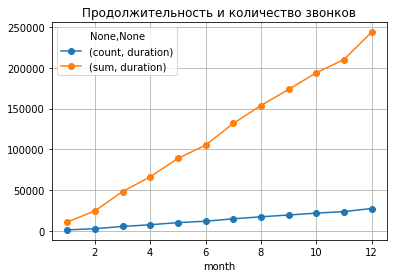

In [18]:
# взглянем на завиисмости графически
clear_calls.pivot_table(index = 'month', values = 'duration', aggfunc = ['count', 'sum']).\
plot(grid=True, style = 'o-', title = 'Продолжительность и количество звонков')
plt.show()

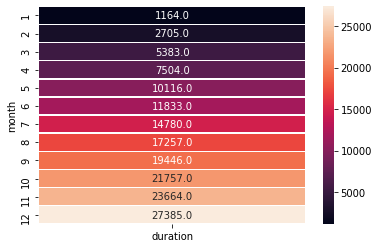

In [19]:
# взглянем на данные по методу heatmap
clear_calls_stat1 = clear_calls.pivot_table(
                            index = 'month', 
                            values = 'duration', 
                            aggfunc = 'count').fillna(0).applymap(float)
clear_calls_stat2 = clear_calls.pivot_table(
                            index = 'month', 
                            values = 'duration', 
                            aggfunc = 'sum').fillna(0).applymap(float)
sns.heatmap(clear_calls_stat1, annot=True, fmt=".1f", linewidths=.5)

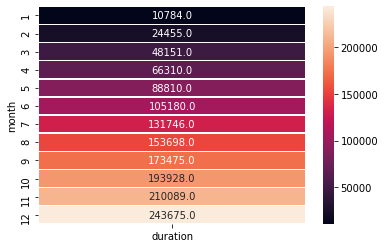

In [20]:
sns.heatmap(clear_calls_stat2, annot=True, fmt=".1f", linewidths=.5)

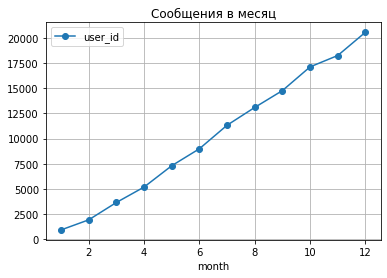

In [21]:
# очевидно, что нагрузка расчёт с приблежением нового года
# количество отправленных сообщений по месяцам;
df_messages.pivot_table(index = 'month', values = 'user_id', aggfunc = 'count').\
plot(grid=True, style = 'o-', title = 'Сообщения в месяц')
plt.show()

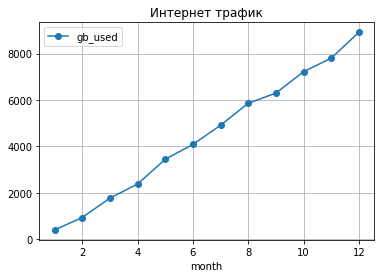

In [22]:
# объем израсходованного интернет-трафика по месяцам;
df_internet.pivot_table(index = 'month', values = 'gb_used', aggfunc = 'sum').\
plot(grid=True, style = 'o-', title = 'Интернет трафик')
plt.show()

In [23]:
clear_calls_stat = clear_calls.groupby(['user_id','month']).agg({'duration' : 'sum'}).reset_index()
calls_stat = clear_calls.groupby(['user_id','month']).agg({'duration' : 'count'})
df_messages_stat = df_messages.groupby(['user_id','month']).agg({'user_id' : 'count'})
df_internet_stat = df_internet.groupby(['user_id','month']).agg({'gb_used' : 'sum'})
# переименуем колонки
df_messages_stat.columns = ['messages_sum']
calls_stat.columns = ['calls']
df_messages_stat['messages_sum'] = df_messages_stat['messages_sum'].fillna(0)
# сгруппируем табличку по юзеру
final_table = clear_calls_stat.merge(df_messages_stat,  how = 'outer', on = ['user_id', 'month']).\
merge(calls_stat,  how = 'outer', on = ['user_id', 'month']).\
merge(df_internet_stat,  how = 'outer', on = ['user_id', 'month']).\
merge(df_users[['user_id', 'tariff', 'city']], how = 'left', on = 'user_id')
# final_table

In [24]:
# заполним пропуски красивыми нулями
final_table['duration'] = final_table['duration'].fillna(0)
final_table['messages_sum'] = final_table['messages_sum'].fillna(0)
final_table['gb_used'] = final_table['gb_used'].fillna(0)
final_table['calls'] = final_table['calls'].fillna(0)

In [25]:
# посчитаем помесячную выручку с каждого пользователя
df_tariff = pd.read_csv(root_path + 'tariffs.csv', index_col = 'tariff_name')

def users_benefits(row, df_tariff = df_tariff):
    tariff = row['tariff']
    short_min = row['duration']
    short_message = row['messages_sum']
    short_internet = row['gb_used']
   
    minutes_limit = df_tariff.loc[tariff, 'minutes_included']
    messages_limit = df_tariff.loc[tariff, 'messages_included']
    internet_limit = df_tariff.loc[tariff, 'mb_per_month_included']
   
    call_overlimit = max(short_min - minutes_limit, 0)
    call_overpay = call_overlimit * df_tariff.loc[tariff, 'rub_per_minute']
   
    messages_overlimit = max(short_message - messages_limit, 0)
    messages_overpay = messages_overlimit * df_tariff.loc[tariff, 'rub_per_message']
   
    internet_overlimit = max(short_internet - (internet_limit / 1024), 0)
    internet_overpay = internet_overlimit * df_tariff.loc[tariff, 'rub_per_gb']
                             
    fee_per_m = call_overpay + messages_overpay + internet_overpay + df_tariff.loc[tariff, 'rub_monthly_fee']
    return fee_per_m

final_table['fee_per_m'] = final_table[['tariff', 'duration', 'messages_sum', 'gb_used']].apply(users_benefits, axis = 1)
#final_table.head(10)
final_table.describe()

,user_id,month,duration,messages_sum,calls,gb_used,fee_per_m
count,3214.000,3214.000,3214.000,3214.000,3214.000,3214.000,3214.000
mean,1251.590,8.317,451.245,38.281,50.714,16.804,1484.638
std,144.659,2.905,241.910,36.148,26.951,7.394,782.900
min,1000.000,1.000,0.000,0.000,0.000,0.000,550.000
25%,1125.000,6.000,282.000,9.000,32.000,12.199,691.886
50%,1253.000,9.000,443.000,30.000,50.000,16.546,1557.608
75%,1378.750,11.000,589.000,57.000,66.000,20.922,1950.000
max,1499.000,12.000,1673.000,224.000,190.000,48.580,6699.775


**Шаг 3. Проанализируем данные**

In [26]:
# проанализируем все зависимости между собой

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


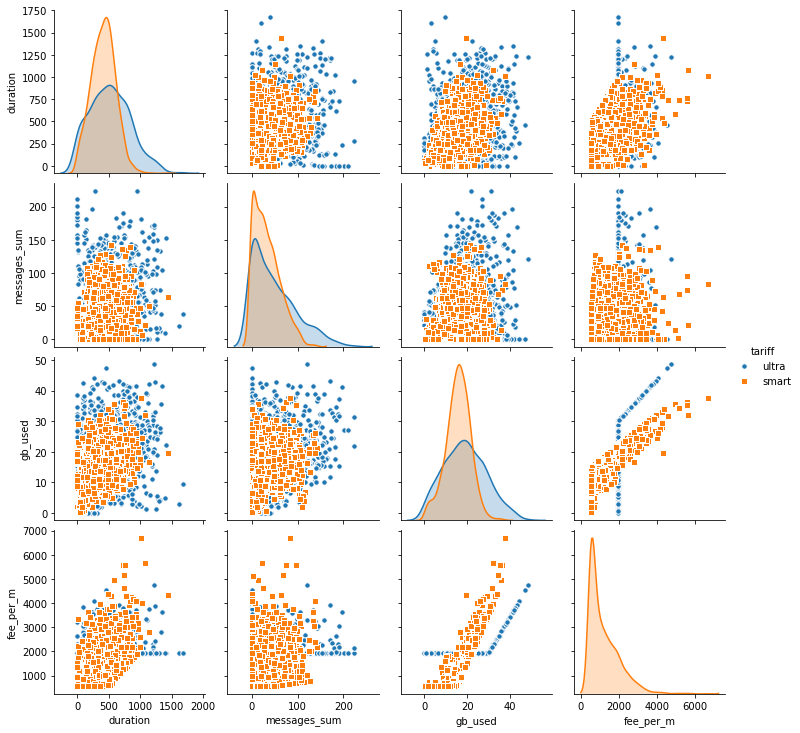

In [36]:
cols = ['tariff', 'duration', 'messages_sum', 'gb_used', 'fee_per_m']
sns.pairplot(final_table[cols], hue="tariff", markers = ["o", "s"], diag_kws = dict(shade=True), 
                        plot_kws = dict(s = 30, linewidth = 1))

**Опишем графики:**
- "Ультра" используют на 30% меньше чем доступный смарт. 
- лимиты пакетов исчерпывают все клиенты, при этом клиенты "ультры" едва переплачивают.
- пакета услуг хватает менее половины клиентов "смарт". 
- приходится доплачивать в особенности за доп минуты, и половина не контролируют свои объемы, хоть и смарт.

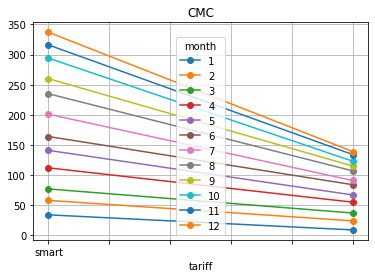

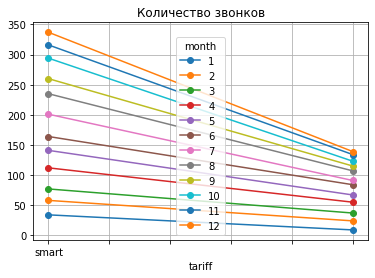

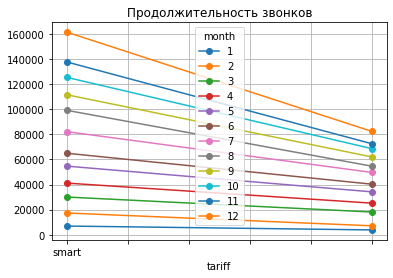

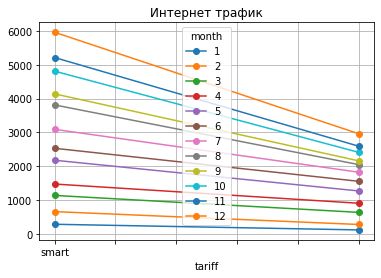

In [28]:
# посомтрим объемы распределений по мясецам
final_table.pivot_table(
     index = 'tariff', values = 'messages_sum', columns = 'month',
     aggfunc = 'count').plot(grid=True, style = 'o-', title = 'СМС')
final_table.pivot_table(
     index = 'tariff', values = 'calls', columns = 'month',
     aggfunc = 'count').plot(grid=True, style = 'o-', title = 'Количество звонков')
final_table.pivot_table(
    index = 'tariff', values = 'duration', columns = 'month', 
    aggfunc = 'sum').plot(grid=True, style = 'o-', title = 'Продолжительность звонков')
final_table.pivot_table(
    index = 'tariff', values = 'gb_used', columns = 'month', 
    aggfunc = 'sum').plot(grid=True, style = 'o-', title = 'Интернет трафик')

In [29]:
# final_table['city'].value_counts()

In [30]:
# пользователям тарифа "ультра" требуется почти в 2 раза меньше объемов для общения, чем "смарт"
# Посчитаем среднее количество, дисперсию и стандартное отклонение. 
final_table.groupby(['tariff']).agg({'duration': ['mean','var','std'],
                                     'calls': ['mean','var','std'],
                                     'messages_sum': ['mean','var','std'],
                                     'gb_used': ['mean','var','std'],
                                     'fee_per_m': ['mean','var','std']})

duration                     calls                 messages_sum  \
           mean        var     std   mean      var    std         mean   
tariff                                                                   
smart   417.935  36219.316 190.314 46.948  442.647 21.039       33.384   
ultra   526.623 100873.633 317.606 59.237 1264.707 35.563       49.363   

                       gb_used              fee_per_m                     
            var    std    mean    var   std      mean        var     std  
tariff                                                                    
smart   796.813 28.228  15.829 32.866 5.733  1230.442 617357.200 785.721  
ultra  2285.266 47.804  19.013 97.037 9.851  2059.869 125940.375 354.881

In [31]:
# Посчитаем среднее количество, дисперсию и стандартное отклонение. 
final_table.pivot_table(columns = 'tariff',
                        values = ['duration', 'calls', 'messages_sum', 'gb_used', 'fee_per_m'],
                        aggfunc = ['mean', np.var,'std'])

mean                 var                std        
tariff          smart    ultra      smart      ultra   smart   ultra
calls          46.948   59.237    442.647   1264.707  21.039  35.563
duration      417.935  526.623  36219.316 100873.633 190.314 317.606
fee_per_m    1230.442 2059.869 617357.200 125940.375 785.721 354.881
gb_used        15.829   19.013     32.866     97.037   5.733   9.851
messages_sum   33.384   49.363    796.813   2285.266  28.228  47.804

Шаг 4. Проверка гипотез
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
Пороговое значение alpha задайте самостоятельно.

In [32]:
# проверим гипотезу - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
# Пускай нулевая гипотеза (H0) - это средняя выручка тарифов равны, а альтернативная (H1) - то что они отличаются.
# используем критерий Стюдента о равенстве средних st.ttest_ind

profit_smart = final_table[final_table['tariff'] == 'smart']['fee_per_m']
profit_ultra = final_table[final_table['tariff'] == 'ultra']['fee_per_m']

# зададим критический уровень статистической значимости
alpha = 0.05 

# проведем тест и посчитаем p-значение
results =  st.ttest_ind(
    profit_smart,
    profit_ultra, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6264184497198272e-298
Отвергаем нулевую гипотезу


In [33]:
# сравним средние выручки из Москвы с СПБ и Уфой
# проверим гипотезу - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов (СПБ);
# Пускай нулевая гипотеза (H0) это средняя выручка равна, а альтернативная (H1) - то что они различаются.
# используем критерий Стюдента о равенстве средних st.ttest_ind
profit_mos = final_table[final_table['city'] == 'Москва']['fee_per_m']
profit_spb = final_table[final_table['city'] == 'Санкт-Петербург']['fee_per_m']
profit_ufa = final_table[final_table['city'] == 'Уфа']['fee_per_m']

In [34]:
# зададим критический уровень статистической значимости
alpha = 0.05 
# проведем тест и посчитаем p-значение
results =  st.ttest_ind(
    profit_mos,
    profit_spb)

print('p-значение Москва vs СПБ:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение Москва vs СПБ: 0.31349051368382064
Не получилось отвергнуть нулевую гипотезу


In [35]:
results =  st.ttest_ind(
    profit_mos,
    profit_ufa)

print('p-значение Москва vs Уфа:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение Москва vs Уфа: 0.8201270529193221
Не получилось отвергнуть нулевую гипотезу


### Похоже что, средние выручки очень близки к друг другу

Выводы:
1. Таблицы преддоработаны, отсечена нулевая продолжительность звонков
2. Нагрузка использование тарифов линейно растёт с приближением нового года.
3. Ультра используют на 30% меньше, чем доступный смарт. 
4. Лимиты пакетов исчерпывают все клиенты, при этом клиенты "ультры" едва переплачивают.
5. Объема пакета хватает менее, чем половине клиентов "смарт". 
6. приходится доплачивать в особенности за дополнительные минуты, и половина не контролируют свои объемы, хоть и "смарт".
7. пользователям тарифа "ультра" требуется почти в 2 раза меньше объемов для общения, чем "смарт"
8. Гипотеза о равенстве средних выручек между тарифами отвергнута.
9. Гипотеза о равенстве средних выручек между Москвой, Питером и Уфой подтверждена.